Car Insurance data Finding Best Model for permissable Loss Prediction



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Steps:


1. Loading Dataset

1. EDA

1. Feature Engineering

1. Model Evaluation

1. Performance




#Loading the data

Data is about Car Insurances. It consists of all the information that an insurance company need to know and to keep the record of to approve the insurance and to know it's performance, profit and loss.

Data is

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/training_data.csv')

<ipython-input-2-72b8f6c7cc85>:1: DtypeWarning: Columns (6,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/training_data.csv')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424430 entries, 0 to 424429
Data columns (total 69 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   PolicyNo                                  424430 non-null  int64  
 1   Policy_Company                            424430 non-null  object 
 2   Policy_Installment_Term                   424430 non-null  int64  
 3   Policy_Billing_Code                       424430 non-null  object 
 4   Policy_Method_Of_Payment                  424430 non-null  object 
 5   Policy_Reinstatement_Fee_Indicator        424430 non-null  object 
 6   Policy_Zip_Code_Garaging_Location         424430 non-null  object 
 7   Vehicle_Territory                         424430 non-null  int64  
 8   Vehicle_Make_Year                         424430 non-null  int64  
 9   Vehicle_Make_Description                  424430 non-null  object 
 10  Vehicle_Performance 

In [ ]:
# checking for columns with null values
null_counts = df.isnull().sum()
print("Columns with null values:\n")
print(null_counts[null_counts > 0])

Columns with null values:

Vehicle_Bodily_Injury_Limit      17326
EEA_Prior_Bodily_Injury_Limit    17326
dtype: int64


Here, we can see that above 2 coulmns have null values.
Let's handle those null values.

In [ ]:
df['Vehicle_Bodily_Injury_Limit']

0         250-500
1         100-300
2         250-500
3         50-100 
4         50-100 
           ...   
424425        NaN
424426    100-300
424427    250-500
424428    50-100 
424429        NaN
Name: Vehicle_Bodily_Injury_Limit, Length: 424430, dtype: object

In [ ]:
df['EEA_Prior_Bodily_Injury_Limit']

0         100-400
1         100-200
2         100-400
3         40-100 
4         40-100 
           ...   
424425        NaN
424426    100-200
424427    100-400
424428    40-100 
424429        NaN
Name: EEA_Prior_Bodily_Injury_Limit, Length: 424430, dtype: object

In [ ]:
print(df['Vehicle_Bodily_Injury_Limit'].unique())

['250-500' '100-300' '50-100 ' '25-50  ' nan '300-500' '100-500' '500-500'
 '1M-1M  ']


In [ ]:
df['EEA_Prior_Bodily_Injury_Limit'].unique()

array(['100-400', '100-200', '40-100 ', '20-50', nan, '200-400', '75-300',
       '300-300', '750-750'], dtype=object)

"NaN" are the null values that we need to handle. Data type is not numerical.

Above all the values starting from 25 to 50 but we have an outlier with 1M as its value. We need to elimate this value.

In [ ]:
# Let's define a function which wilii eliminate extra spacing and convert these object datatypes to numerical values.
import re

def convertLabel(i):
    # Check if the input is a string and contains a hyphen but no uppercase letters
    if isinstance(i, str) and '-' in i and not bool(re.search('[A-Z]', i)):
        # Split the string into two parts on the hyphen
        left, right = i.split('-')
        # Strip whitespace and convert to float
        left = float(left.strip())
        right = float(right.strip())
        # Calculate and return the average
        return (left + right) / 2
    else:
        # Return NaN for non-matching patterns or types
        return np.nan

In [ ]:
df['Vehicle_Bodily_Injury_Limit']=df['Vehicle_Bodily_Injury_Limit'].apply(convertLabel)
#We are doing this because there might be some non numeric values in these columns, so we are avoiding those.
df['Vehicle_Bodily_Injury_Limit']=df['Vehicle_Bodily_Injury_Limit'].interpolate(method ='ffill')

In [ ]:
df['EEA_Prior_Bodily_Injury_Limit']=df['EEA_Prior_Bodily_Injury_Limit'].apply(convertLabel)
df['EEA_Prior_Bodily_Injury_Limit']=df['EEA_Prior_Bodily_Injury_Limit'].interpolate(method ='ffill')

In [ ]:
df['Vehicle_Bodily_Injury_Limit']

0         375.0
1         200.0
2         375.0
3          75.0
4          75.0
          ...  
424425    200.0
424426    200.0
424427    375.0
424428     75.0
424429     75.0
Name: Vehicle_Bodily_Injury_Limit, Length: 424430, dtype: float64

In [ ]:
df['EEA_Prior_Bodily_Injury_Limit'].value_counts()

EEA_Prior_Bodily_Injury_Limit
35.0     151241
150.0    135782
70.0     112577
250.0     22742
300.0      1515
187.5       527
750.0        46
Name: count, dtype: int64

In [ ]:
print("After coverting: ")
print(df['Vehicle_Bodily_Injury_Limit'].unique())
print(df['EEA_Prior_Bodily_Injury_Limit'].unique())

After coverting: 
[375.  200.   75.   37.5 400.  300.  500. ]
[250.  150.   70.   35.  300.  187.5 750. ]


We have divided dataset into numerical and categorical datasets

In [ ]:
# dividing df into df with only numerical values
numerical_cols = df.select_dtypes(include=['int64', 'float64'])
print(numerical_cols.shape[1])

44


In [ ]:
#dataframe of categorical values
categorical_cols = df.select_dtypes(include='object')
print("number of categorical columns: ",categorical_cols.shape[1])

number of categorical columns:  25


Inorder to do any kind of analysis, we need to convert categorical values into numerical.

In [ ]:
# Removing Trailing and Leading Spaces in categoricalcolumns of Dataframe
df[categorical_cols.columns] = df[categorical_cols.columns].apply(lambda x: x.str.strip())

In [ ]:
null_counts_1 = df.isnull().sum()
print("Columns with null values:\n")
print(null_counts[null_counts_1 > 0])

Columns with null values:

Policy_Zip_Code_Garaging_Location    0
EEA_Policy_Zip_Code_3                0
dtype: int64


Above, we can see that none of the columns have null values i.e., NaN in value but there is a possibility of '0', '-1' inplace of NaN.

In [ ]:
#For Vehicle_New_Cost_Amount we are checking how many unique values are present.
df['Vehicle_New_Cost_Amount'].value_counts()

Vehicle_New_Cost_Amount
-1        417344
 0           662
 20000       619
 18000       434
 15000       413
           ...  
 500           1
 91979         1
 32002         1
 67000         1
 65000         1
Name: count, Length: 177, dtype: int64

It has so many '-1' values. It's better to drop that column .

In [ ]:
df.dropna(subset=['Vehicle_New_Cost_Amount'], inplace=True)

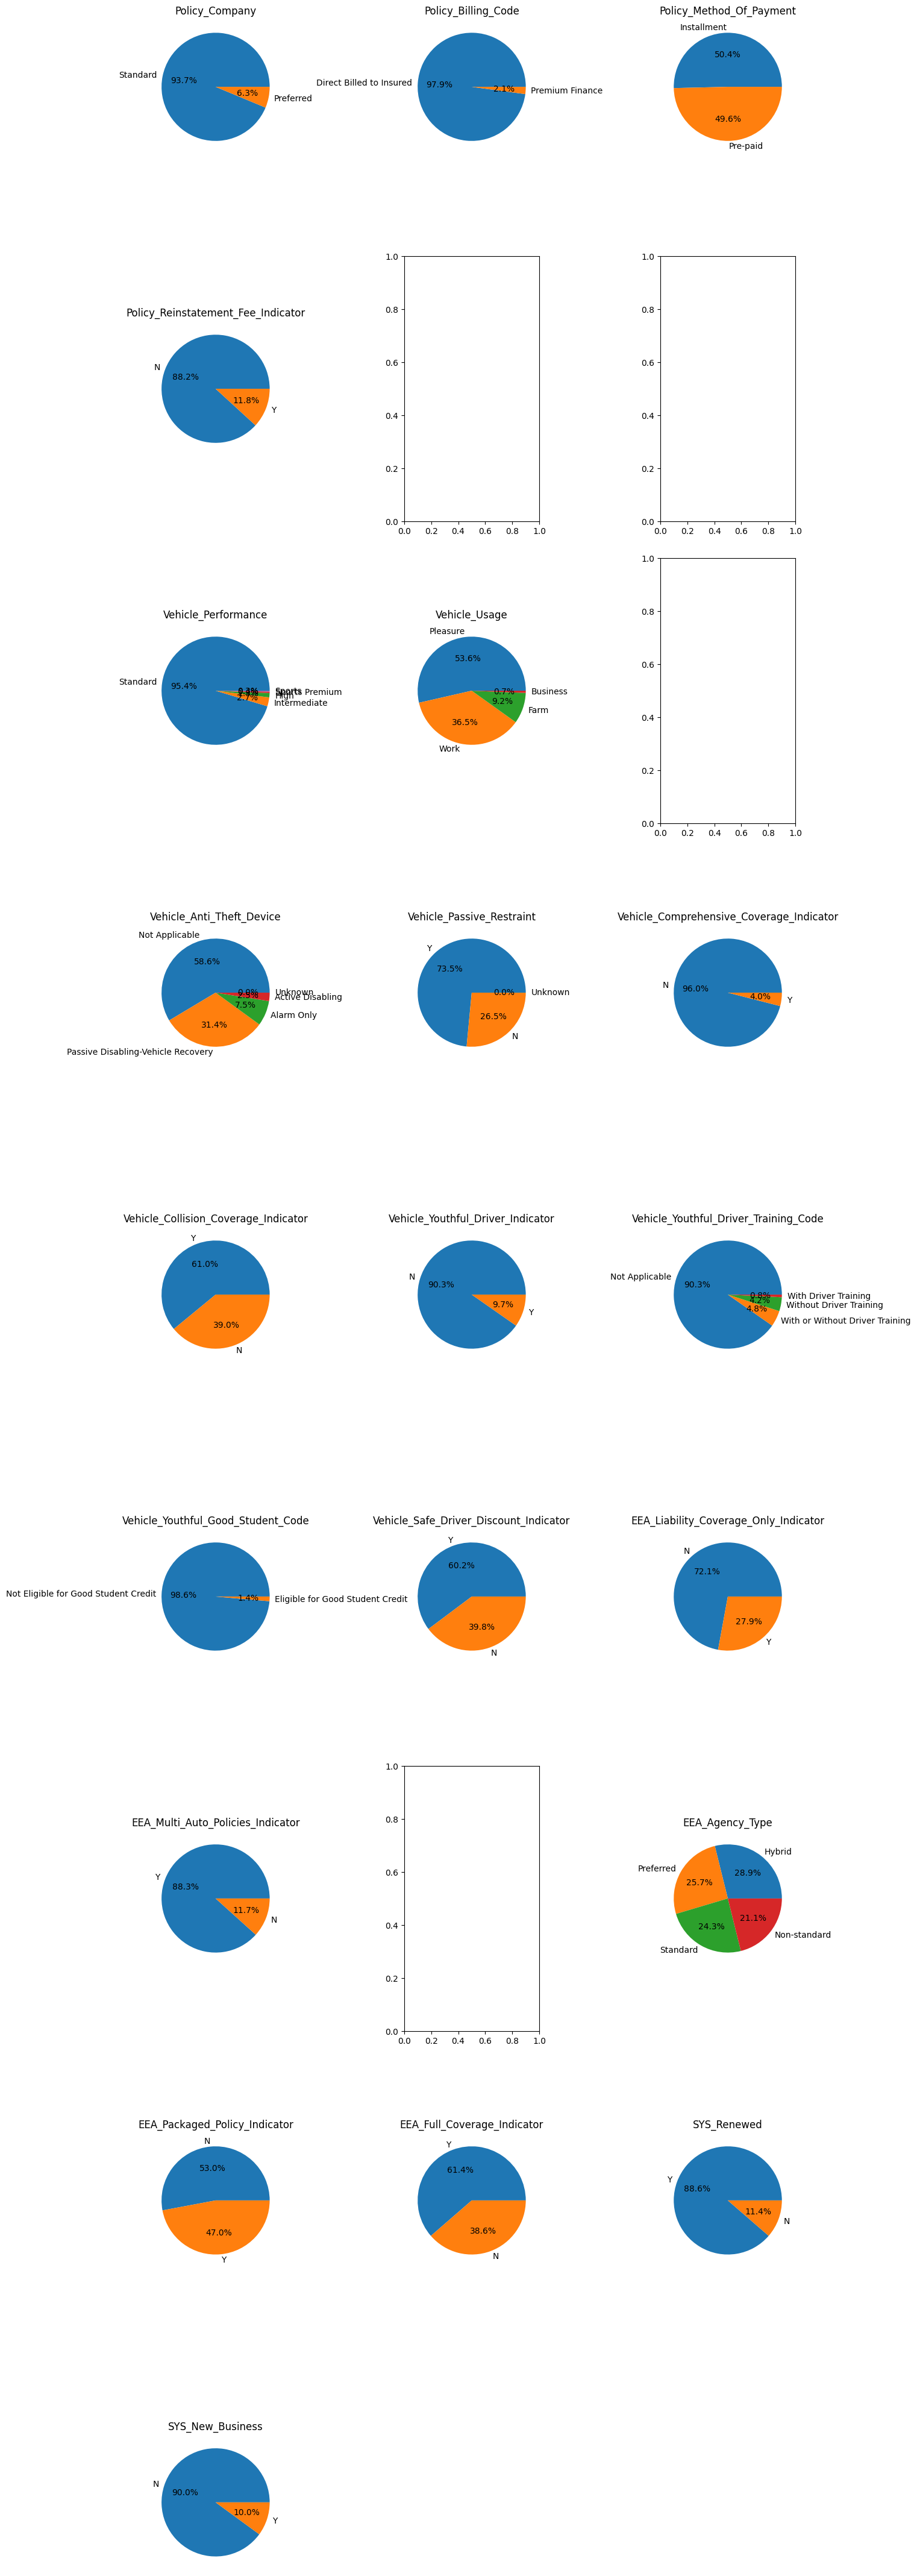

In [ ]:
#Analysisng each column
import math
import matplotlib.pyplot as plt

# Define the number of columns and rows for subplot layout
num_cols = 3
num_rows = math.ceil(len(df.select_dtypes(include=['object']).columns) / num_cols)

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Loop through each categorical column in the dataframe and plot a pie chart
for i, categorical_col in enumerate(df.select_dtypes(include=['object'])):
    if df[categorical_col].nunique() < 10:  # Pie chart is suitable for a smaller number of categories
        category_counts = df[categorical_col].value_counts()
        axs[i].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
        axs[i].set_title(categorical_col)

# Hide any extra subplots
if len(axs) > len(df.select_dtypes(include=['object']).columns):
    for i in range(len(df.select_dtypes(include=['object']).columns), len(axs)):
        axs[i].set_visible(False)

plt.tight_layout()
plt.show()


#Feature Engineering

In [ ]:
numerical_cols

,PolicyNo,Policy_Installment_Term,Vehicle_Territory,Vehicle_Make_Year,Vehicle_New_Cost_Amount,Vehicle_Symbol,Vehicle_Number_Of_Drivers_Assigned,Vehicle_Miles_To_Work,Vehicle_Days_Per_Week_Driven,Vehicle_Age_In_Years,...,Vehicle_Driver_Points,EEA_Policy_Tenure,EEA_Prior_Bodily_Injury_Limit,EEA_PolicyYear,Annual_Premium,Claim_Count,Loss_Amount,Frequency,Severity,Loss_Ratio
0,164532941,6,35,2004,-1,11,1,-1,5,3,...,0,22.7,250.0,2006,320.12,0,0.0,0.0,0.0,0.0
1,164533241,6,35,1980,-1,11,1,-1,5,9,...,0,47.1,150.0,2006,259.70,0,0.0,0.0,0.0,0.0
2,164534633,6,17,2005,-1,10,1,-1,5,2,...,0,47.2,250.0,2006,613.74,0,0.0,0.0,0.0,0.0
3,164534839,6,17,2005,-1,12,1,-1,5,2,...,0,46.7,70.0,2006,541.66,0,0.0,0.0,0.0,0.0
4,164534840,6,17,2005,-1,12,1,-1,5,2,...,0,47.2,70.0,2006,541.66,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424425,381713000,6,35,1999,-1,8,2,-1,5,9,...,0,0.0,150.0,2006,162.55,0,0.0,0.0,0.0,0.0
424426,381735600,6,31,2000,-1,8,2,-1,5,8,...,0,0.0,150.0,2006,117.13,0,0.0,0.0,0.0,0.0
424427,382057400,6,35,1997,-1,8,1,-1,5,9,...,0,0.0,250.0,2006,118.21,0,0.0,0.0,0.0,0.0
424428,382162500,6,31,1998,-1,17,1,-1,5,9,...,0,0.0,70.0,2006,103.93,0,0.0,0.0,0.0,0.0


In [ ]:
# Adjusting the 'Vehicle_Days_Per_Week_Driven' column to range from 0 to 7
def adjust_vehicle_days_per_week_driven(x):
    mode_value = x.mode()[0]  # Calculate the mode of the column
    x[x < 0] = mode_value     # Replace negative values with the mode value
    x[x > 7] = mode_value     # Replace values greater than 7 with the mode value
    return x

# Apply the adjustment function to the 'Vehicle_Days_Per_Week_Driven' column
df['Vehicle_Days_Per_Week_Driven'] = adjust_vehicle_days_per_week_driven(df['Vehicle_Days_Per_Week_Driven'])

# Check the value counts after adjustment
df['Vehicle_Days_Per_Week_Driven'].value_counts()


<ipython-input-23-f1212b7a8c24>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[x < 0] = mode_value     # Replace negative values with the mode value
<ipython-input-23-f1212b7a8c24>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[x > 7] = mode_value     # Replace values greater than 7 with the mode value


Vehicle_Days_Per_Week_Driven
5    424302
0        63
1        17
3        16
6        15
2         7
4         5
7         5
Name: count, dtype: int64

In [ ]:
df['Vehicle_Miles_To_Work'].value_counts()

Vehicle_Miles_To_Work
-1     266231
 10     30906
 5      18533
 12     12986
 8      11489
        ...  
 61         1
 93         1
 67         1
 98         1
 59         1
Name: count, Length: 80, dtype: int64

Above, we can see that distance is negative which is not possible. We need to handle this.

In [ ]:
df['Vehicle_Miles_To_Work'].describe()

count    424430.00000
mean          3.30241
std           7.69830
min          -1.00000
25%          -1.00000
50%          -1.00000
75%           6.00000
max          99.00000
Name: Vehicle_Miles_To_Work, dtype: float64

In [ ]:
# replacing -1 with median of rest of values
median_value = df.loc[df['Vehicle_Miles_To_Work'] != -1, 'Vehicle_Miles_To_Work'].median()
df['Vehicle_Miles_To_Work'] = df['Vehicle_Miles_To_Work'].replace(-1, median_value)
df['Vehicle_Miles_To_Work'].describe()


count    424430.000000
mean         10.202349
std           5.308596
min           0.000000
25%          10.000000
50%          10.000000
75%          10.000000
max          99.000000
Name: Vehicle_Miles_To_Work, dtype: float64

In the dataset, we have 2 columns 'Vehicle_Days_Per_Week_Driven' and 'Vehicle_Miles_To_Work'.  We can create  a new column as Vehicle_Annual_Miles which can be calculated using Distance = Speed * Time

In [ ]:
# Replacing all unkown values by formula
df['Vehicle_Annual_Miles'] = df['Vehicle_Days_Per_Week_Driven'] * df['Vehicle_Miles_To_Work'] * 52
df['Vehicle_Annual_Miles'].describe()

count    424430.000000
mean       2652.218326
std        1380.452180
min           0.000000
25%        2600.000000
50%        2600.000000
75%        2600.000000
max       25740.000000
Name: Vehicle_Annual_Miles, dtype: float64

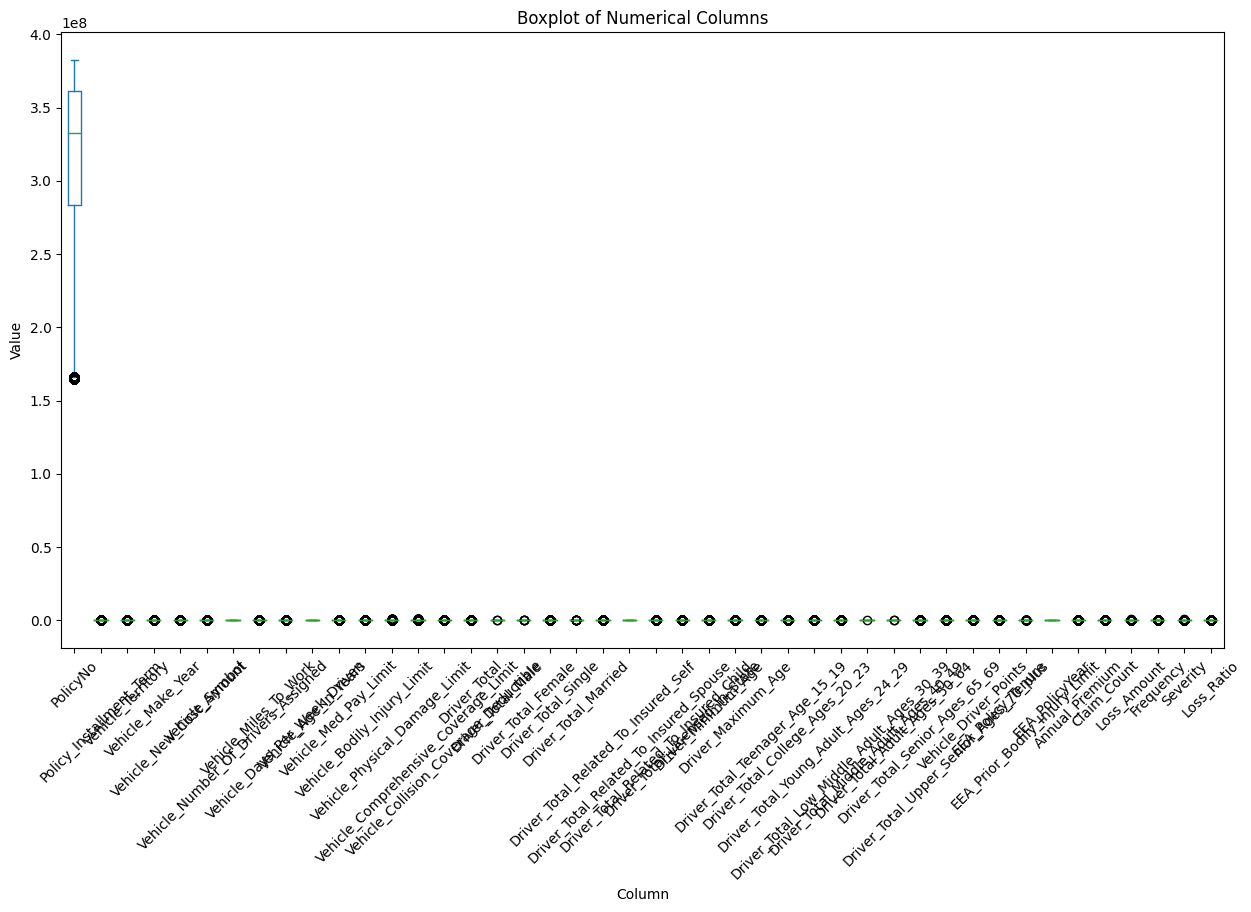

In [ ]:
# Create boxplots for numerical columns
numerical_cols.plot(kind='box', figsize=(15, 8))
plt.title('Boxplot of Numerical Columns')
plt.xlabel('Column')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Create KDE plots for numerical columns
#numerical_cols.plot(kind='density', subplots=True, layout=(math.ceil(len(numerical_cols.columns)/2), 2), figsize=(15, 20), sharex=False)
#plt.title('Kernel Density Estimate (KDE) Plots of Numerical Columns')
#plt.xlabel('Value')
#plt.ylabel('Density')
#plt.show()


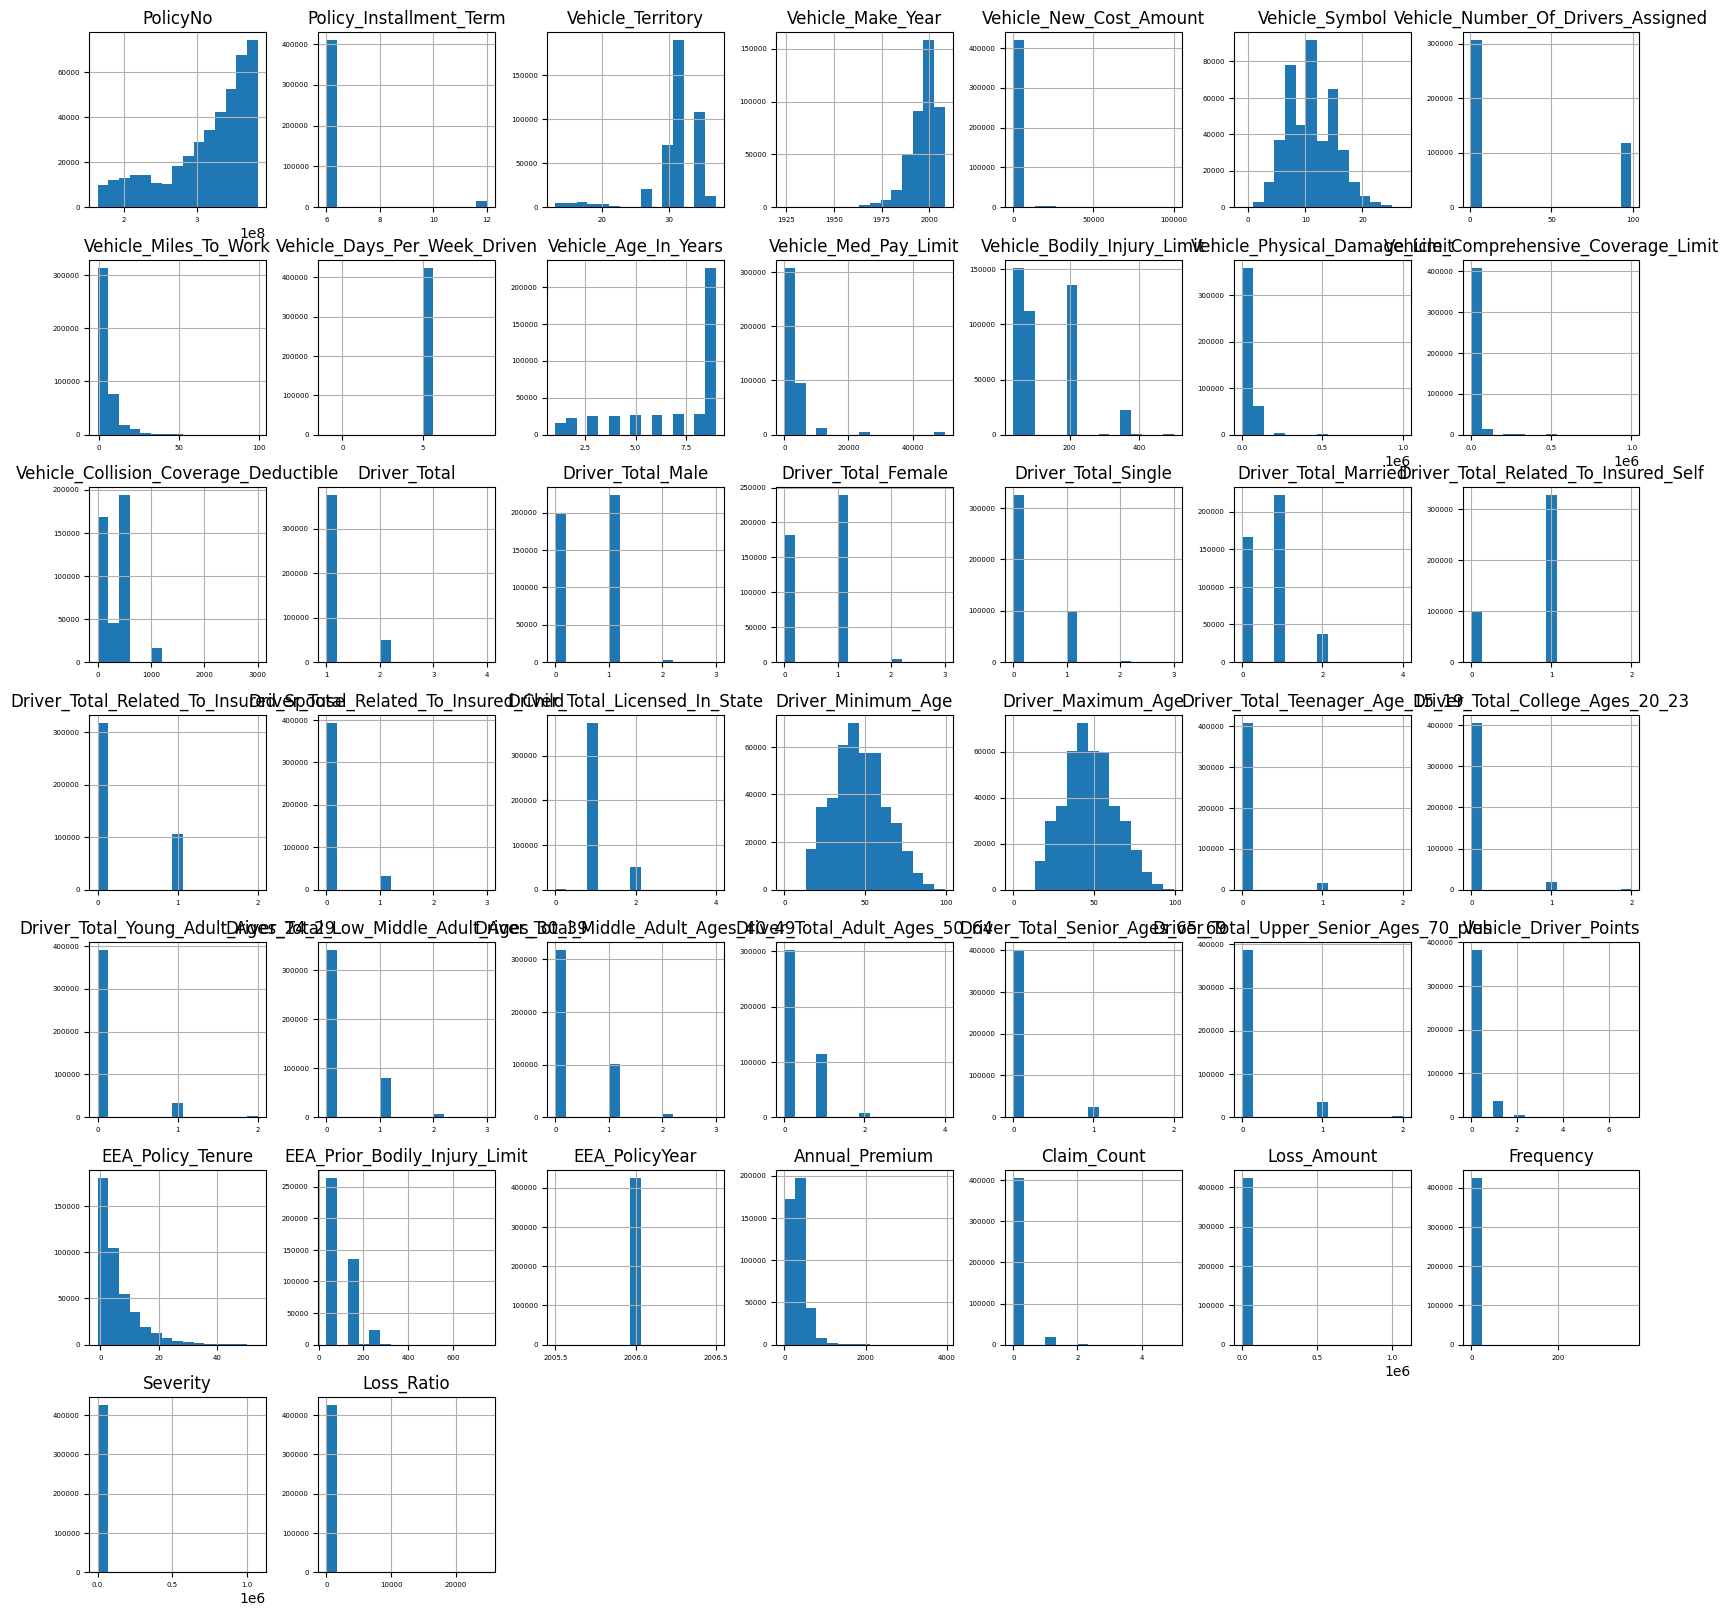

In [ ]:
# histogram of numerical columns
numerical_cols.hist(figsize=(20, 20), bins=15, xlabelsize=5, ylabelsize=5);

Now, we need to check for muiti collinearity and drop redundant columns from data.

In [ ]:
numerical_cols.corr()

,PolicyNo,Policy_Installment_Term,Vehicle_Territory,Vehicle_Make_Year,Vehicle_New_Cost_Amount,Vehicle_Symbol,Vehicle_Number_Of_Drivers_Assigned,Vehicle_Miles_To_Work,Vehicle_Days_Per_Week_Driven,Vehicle_Age_In_Years,...,Vehicle_Driver_Points,EEA_Policy_Tenure,EEA_Prior_Bodily_Injury_Limit,EEA_PolicyYear,Annual_Premium,Claim_Count,Loss_Amount,Frequency,Severity,Loss_Ratio
PolicyNo,1.000000,0.074223,-0.020722,0.027824,0.015797,0.079459,0.126594,0.011693,0.007795,-0.030599,...,0.072865,-0.879130,-0.029011,NaN,0.034531,0.027507,0.014785,0.011559,0.014270,0.003050
Policy_Installment_Term,0.074223,1.000000,0.001015,0.026641,0.005615,0.023674,-0.000886,0.006645,0.001091,-0.030859,...,0.017890,-0.061027,0.020803,NaN,0.325114,0.045433,0.015728,0.003593,0.014125,0.000054
Vehicle_Territory,-0.020722,0.001015,1.000000,-0.009059,-0.007688,-0.005888,0.002481,-0.018702,0.003195,-0.006028,...,-0.010606,0.021059,0.066192,NaN,-0.034598,-0.013096,-0.005857,-0.005909,-0.005771,-0.003306
Vehicle_Make_Year,0.027824,0.026641,-0.009059,1.000000,0.035136,0.498725,0.003661,0.075274,0.000372,-0.704518,...,0.059103,-0.045145,0.159135,NaN,0.541244,0.075605,0.027465,0.020062,0.026553,0.002206
Vehicle_New_Cost_Amount,0.015797,0.005615,-0.007688,0.035136,1.000000,0.061647,0.003942,-0.000727,-0.000258,-0.041822,...,0.001182,-0.017089,0.022391,NaN,0.049957,0.004213,0.000749,0.001361,0.000732,-0.000493
Vehicle_Symbol,0.079459,0.023674,-0.005888,0.498725,0.061647,1.000000,0.047244,0.026137,0.001297,-0.416820,...,0.049263,-0.087707,0.152554,NaN,0.453452,0.051319,0.021756,0.014877,0.020999,0.001186
Vehicle_Number_Of_Drivers_Assigned,0.126594,-0.000886,0.002481,0.003661,0.003942,0.047244,1.000000,0.134836,0.000014,-0.015178,...,0.031277,-0.135733,-0.048790,NaN,-0.017217,-0.006816,-0.003429,-0.003227,-0.003409,-0.002467
Vehicle_Miles_To_Work,0.011693,0.006645,-0.018702,0.075274,-0.000727,0.026137,0.134836,1.000000,-0.000579,-0.034012,...,0.039101,-0.024154,-0.044508,NaN,0.121913,0.014275,0.003734,0.005964,0.003601,-0.001067
Vehicle_Days_Per_Week_Driven,0.007795,0.001091,0.003195,0.000372,-0.000258,0.001297,0.000014,-0.000579,1.000000,-0.000715,...,-0.000983,-0.005339,0.000820,NaN,-0.000522,-0.003405,-0.001793,-0.000742,-0.001865,0.000005
Vehicle_Age_In_Years,-0.030599,-0.030859,-0.006028,-0.704518,-0.041822,-0.416820,-0.015178,-0.034012,-0.000715,1.000000,...,-0.041415,0.031904,-0.179042,NaN,-0.547856,-0.062753,-0.028379,-0.012532,-0.027334,-0.001998


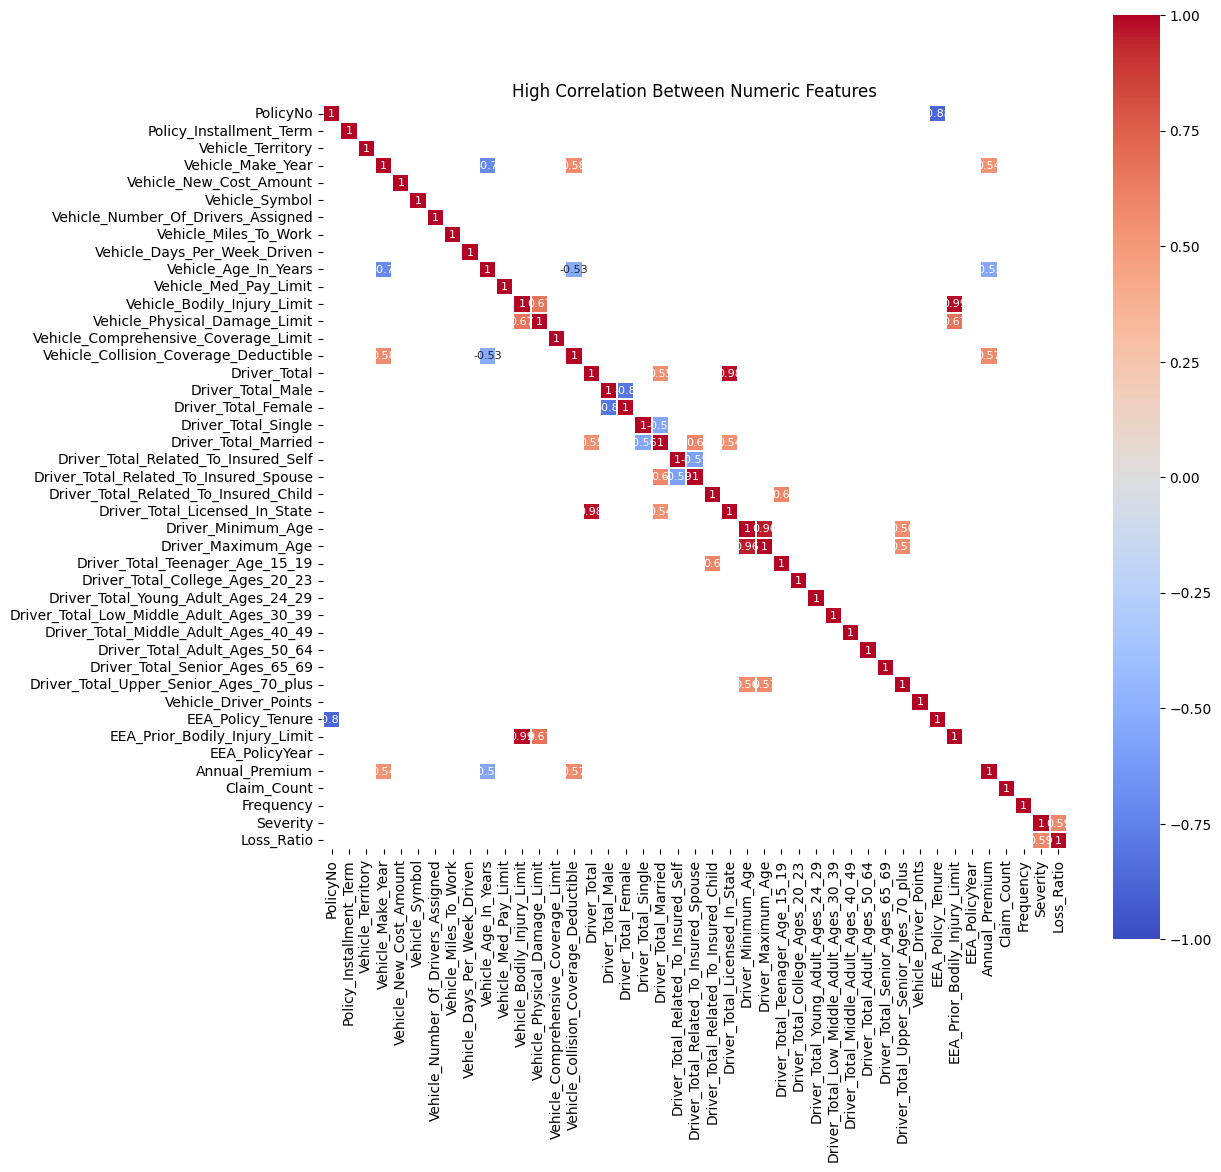

In [ ]:
#Correlation of features with respect to 'Loss amount'

# calculate the correlation matrix
corr = numerical_cols.drop('Loss_Amount', axis=1).corr()

# create a larger figure size
plt.figure(figsize=(12, 12))

# create a heatmap of the correlation matrix
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)],
            cmap='coolwarm', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

# add a title to the plot
plt.title('High Correlation Between Numeric Features')

# show the plot
plt.show()

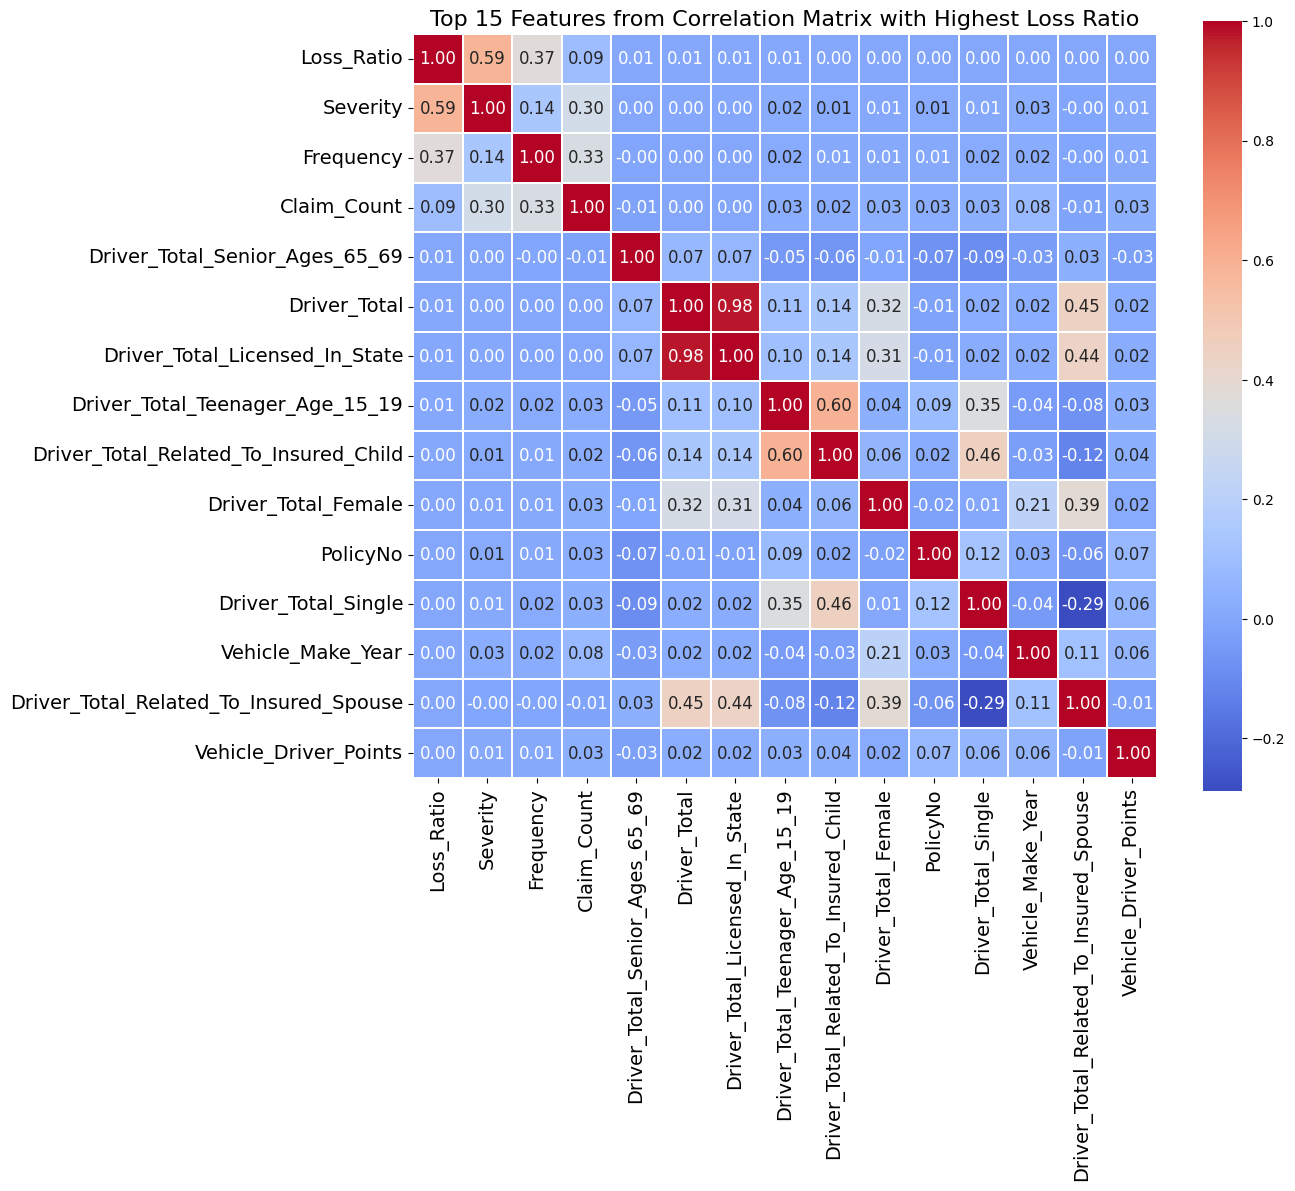

In [ ]:
k = 15
target_col = corr.nlargest(k, 'Loss_Ratio')['Loss_Ratio'].index
cm = np.corrcoef(df[target_col].values.T)

# Create figure and axis objects
fig, ax = plt.subplots(figsize =(12, 10))

# Create heatmap with annotations
sns.heatmap(cm, ax=ax, cmap='coolwarm', linewidths=0.2,
            annot=True, annot_kws={'size': 12},
            fmt='.2f', square=True,
            xticklabels=target_col.values, yticklabels=target_col.values)

# Set title and axis label font sizes
ax.set_title('Top 15 Features from Correlation Matrix with Highest Loss Ratio', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)

In [ ]:
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 0.75
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

# Print the columns with multicollinearity
print(to_drop)

['Driver_Total_Licensed_In_State', 'Driver_Maximum_Age', 'EEA_Prior_Bodily_Injury_Limit']


In [ ]:
#From correlation metrics, we are dropping unwanted columns
# Drop unwanted columns
columns_to_drop = ['Policy_Installment_Term','Policy_Method_Of_Payment',
'Policy_Reinstatement_Fee_Indicator',
'Policy_Zip_Code_Garaging_Location',
'Vehicle_Make_Description',
'Vehicle_New_Cost_Amount',
'Driver_Total',
'Driver_Total_Male',
'Driver_Total_Female',
'Driver_Total_Related_To_Insured_Self',
'Driver_Total_Related_To_Insured_Spouse',
'Driver_Total_Related_To_Insured_Child',
'Driver_Total_Licensed_In_State',
'Vehicle_Youthful_Driver_Indicator',
'Vehicle_Youthful_Driver_Training_Code',
'EEA_Multi_Auto_Policies_Indicator',
'EEA_Policy_Zip_Code_3',
'EEA_Agency_Type',
'EEA_PolicyYear',
'SYS_Renewed',
'SYS_New_Business']
df.drop(columns_to_drop, inplace=True, axis=1)


df.head()

,PolicyNo,Policy_Company,Policy_Billing_Code,Vehicle_Territory,Vehicle_Make_Year,Vehicle_Performance,Vehicle_Symbol,Vehicle_Number_Of_Drivers_Assigned,Vehicle_Usage,Vehicle_Miles_To_Work,...,EEA_Policy_Tenure,EEA_Packaged_Policy_Indicator,EEA_Full_Coverage_Indicator,EEA_Prior_Bodily_Injury_Limit,Annual_Premium,Claim_Count,Loss_Amount,Frequency,Severity,Loss_Ratio
0,164532941,Standard,Direct Billed to Insured,35,2004,Standard,11,1,Farm,10,...,22.7,N,Y,250.0,320.12,0,0.0,0.0,0.0,0.0
1,164533241,Standard,Direct Billed to Insured,35,1980,Standard,11,1,Farm,10,...,47.1,N,Y,150.0,259.70,0,0.0,0.0,0.0,0.0
2,164534633,Standard,Direct Billed to Insured,17,2005,Standard,10,1,Pleasure,10,...,47.2,N,Y,250.0,613.74,0,0.0,0.0,0.0,0.0
3,164534839,Standard,Direct Billed to Insured,17,2005,Standard,12,1,Pleasure,10,...,46.7,Y,Y,70.0,541.66,0,0.0,0.0,0.0,0.0
4,164534840,Standard,Direct Billed to Insured,17,2005,Standard,12,1,Pleasure,10,...,47.2,Y,Y,70.0,541.66,0,0.0,0.0,0.0,0.0


In [ ]:
df.to_csv('data_cleansed.csv', index=False)

Now, lets craete portfolios like we have for test data.

In [ ]:
import os
import pandas as pd
import numpy as np

def create_sample_set(total_policies, df):
    loss_pop = df.loc[df['Claim_Count'] > 0]
    good_pop = df.loc[df['Claim_Count'] == 0]

    # Calculate loss ratio distribution in the dataset
    loss_ratio_dist = []
    for i in range(1, 21):
        loss_ratio_dist.append(loss_pop.loc[loss_pop['Loss_Ratio'] == i]['PolicyNo'].count() / df.loc[df['Loss_Ratio'] == i]['PolicyNo'].count())

    # Define target loss ratios based on the distribution
    target_loss_ratio = []
    for i in range(len(loss_ratio_dist)):
        if loss_ratio_dist[i] >= max(loss_ratio_dist) * 0.1:
            target_loss_ratio.append(i+1)

    # Create directory if it doesn't exist
    root = "/content/drive/MyDrive/training_portfolios"  # Adjust this path according to your directory structure in Google Drive
    os.makedirs(root, exist_ok=True)  # Creates the directory if it doesn't exist

    # Create sample sets and verify distribution of loss ratios
    for x in range(30):
        for y in target_loss_ratio:
            loss_sample_n = int(total_policies * (y/100))
            good_sample_n = int(total_policies - loss_sample_n)
            df1 = loss_pop.sample(loss_sample_n)
            df2 = good_pop.sample(good_sample_n)
            df_full = pd.concat([df1 , df2])

            # Verify distribution of loss ratios in the sample set
            loss_ratio_sample = []
            for i in range(1, 21):
                loss_ratio_sample.append(df_full.loc[df_full['Loss_Ratio'] == i]['PolicyNo'].count() / df_full['PolicyNo'].count())
            if not np.allclose(loss_ratio_sample, loss_ratio_dist, rtol=0.1):
                print("Distribution of loss ratios does not match in sample set " + str(x) + "_" + str(y))

            # Save the sample set as a CSV file
            filename = f"train_portfolio_{int(total_policies/1000)}_{x}_{y}.csv"
            file_path = os.path.join(root, filename)
            df_full.to_csv(file_path)

# Assuming `df` is your DataFrame
create_sample_set(1000, df)


Distribution of loss ratios does not match in sample set 0_1
Distribution of loss ratios does not match in sample set 0_2
Distribution of loss ratios does not match in sample set 0_3
Distribution of loss ratios does not match in sample set 0_4
Distribution of loss ratios does not match in sample set 0_5
Distribution of loss ratios does not match in sample set 0_6
Distribution of loss ratios does not match in sample set 0_7
Distribution of loss ratios does not match in sample set 0_8
Distribution of loss ratios does not match in sample set 0_9
Distribution of loss ratios does not match in sample set 0_10
Distribution of loss ratios does not match in sample set 0_11
Distribution of loss ratios does not match in sample set 0_12
Distribution of loss ratios does not match in sample set 0_13
Distribution of loss ratios does not match in sample set 0_14
Distribution of loss ratios does not match in sample set 0_15
Distribution of loss ratios does not match in sample set 0_16
Distribution of l

In [ ]:
create_sample_set(3000, df)

Distribution of loss ratios does not match in sample set 0_1
Distribution of loss ratios does not match in sample set 0_2
Distribution of loss ratios does not match in sample set 0_3
Distribution of loss ratios does not match in sample set 0_4
Distribution of loss ratios does not match in sample set 0_5
Distribution of loss ratios does not match in sample set 0_6
Distribution of loss ratios does not match in sample set 0_7
Distribution of loss ratios does not match in sample set 0_8
Distribution of loss ratios does not match in sample set 0_9
Distribution of loss ratios does not match in sample set 0_10
Distribution of loss ratios does not match in sample set 0_11
Distribution of loss ratios does not match in sample set 0_12
Distribution of loss ratios does not match in sample set 0_13
Distribution of loss ratios does not match in sample set 0_14
Distribution of loss ratios does not match in sample set 0_15
Distribution of loss ratios does not match in sample set 0_16
Distribution of l

In [ ]:
create_sample_set(5000, df)

Distribution of loss ratios does not match in sample set 0_1
Distribution of loss ratios does not match in sample set 0_2
Distribution of loss ratios does not match in sample set 0_3
Distribution of loss ratios does not match in sample set 0_4
Distribution of loss ratios does not match in sample set 0_5
Distribution of loss ratios does not match in sample set 0_6
Distribution of loss ratios does not match in sample set 0_7
Distribution of loss ratios does not match in sample set 0_8
Distribution of loss ratios does not match in sample set 0_9
Distribution of loss ratios does not match in sample set 0_10
Distribution of loss ratios does not match in sample set 0_11
Distribution of loss ratios does not match in sample set 0_12
Distribution of loss ratios does not match in sample set 0_13
Distribution of loss ratios does not match in sample set 0_14
Distribution of loss ratios does not match in sample set 0_15
Distribution of loss ratios does not match in sample set 0_16
Distribution of l

We have created portfolios for train dataset.  We have test dataset that we already mounted in drive.

#Model Creation

Our next steps:
1. We will extract all the info from this training portfolios.
2. We will calcualte Loss ratio and will create new dataset with new features and Log of this Loss Ratio(ln_LR)
3. We will create a model and use all these on testing portfolios.
4. We will gather all the calculated ln_LR and create a df using these and convert to csv file.


In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/training_portfolios/train_portfolio_5_0_11.csv")
print("Total number of rows: " , df1.shape[0])
print("Total policies without claims: " , df1[df1['Claim_Count'] > 0].shape[0])
print("Policies with loss: ", (df1[df1['Claim_Count'] > 0].shape[0]/df1.shape[0])*100, "%")

Total number of rows:  5000
Total policies without claims:  550
Policies with loss:  11.0 %


In [ ]:
def read_portfolio(filename, index):
    try:
        df1 = pd.read_csv(filename)
    except FileNotFoundError:
        print(f"File '{filename}' not found.")
        return None

    row_count = df1.shape[0]
    d={}
    d['ID']= index
    d['AP_mean'] = df1['Annual_Premium'].mean()
    d['AP_std']= df1['Annual_Premium'].std()
    d['DMA_mean'] = df1['Driver_Maximum_Age'].mean()
    d['DMA_std']= df1['Driver_Maximum_Age'].std()
    d['DSM_RATIO']= (df1['Driver_Total_Single'].sum() / df1['Driver_Total_Married'].sum())
    d['VDP_mean'] = df1['Vehicle_Driver_Points'].mean()
    d['VDP_std']= df1['Vehicle_Driver_Points'].std()
    d['VMY_mean'] = df1['Vehicle_Make_Year'].mean()
    d['VMY_std']= df1['Vehicle_Make_Year'].std()
    d['VAY_mean'] = df1['Vehicle_Age_In_Years'].mean()
    d['VAY_std']= df1['Vehicle_Age_In_Years'].std()
    d['VS_mean'] = df1['Vehicle_Symbol'].mean()
    d['VS_std']= df1['Vehicle_Symbol'].std()
    d['VPDL_PL_Ratio'] = (df1['Vehicle_Physical_Damage_Limit'].sum() / df1['Vehicle_Med_Pay_Limit'].sum())
    d['VCCD_mean'] = df1['Vehicle_Collision_Coverage_Deductible'].mean()
    d['VCCD_std'] = df1['Vehicle_Collision_Coverage_Deductible'].std()
    d['VDW_Driven_mean'] = df1['Vehicle_Days_Per_Week_Driven'].mean()
    d['VDW_Driven_std'] = df1['Vehicle_Days_Per_Week_Driven'].std()
    d['DT_S_T_Ratio'] = (df1['Driver_Total_Senior_Ages_65_69'].sum() / df1['Driver_Total_Teenager_Age_15_19'].sum())
    d['DT_US_M_Ratio'] = (df1['Driver_Total_Upper_Senior_Ages_70_plus'].sum() / df1['Driver_Total_Middle_Adult_Ages_40_49'].sum())
    d['VATD_Active'] = (df1[df1['Vehicle_Anti_Theft_Device']=="Active Disabling"].shape[0]) / row_count
    d['VATD_Alarm'] = (df1[df1['Vehicle_Anti_Theft_Device']=="Alarm Only"].shape[0]) / row_count
    d['VATD_NA'] = (df1[df1['Vehicle_Anti_Theft_Device']=="Not Applicable"].shape[0])/row_count
    d['VATD_Passive'] = (df1[df1['Vehicle_Anti_Theft_Device']=="Passive Disabling-Vehicle Recovery"].shape[0]) / row_count
    d['ln_LR'] = np.log((df1['Loss_Amount'].sum() / df1['Annual_Premium'].sum()))

    return d

In [ ]:
def create_filename_index(filename):
    prefix = 'train_'
    suffix = '.csv'
    if not filename.startswith(prefix):
        raise ValueError(f"Filename '{filename}' does not start with expected prefix '{prefix}'")
    if not filename.endswith(suffix):
        raise ValueError(f"Filename '{filename}' does not end with expected suffix '{suffix}'")
    filename = os.path.splitext(filename)[0]  # remove file extension
    _, _, index = filename.partition(prefix)
    return index

In [ ]:
directory = "/content/drive/MyDrive/training_portfolios"
all_data = []
import os
for entry in os.scandir(directory):
    if entry.is_file() and entry.name.startswith("train_portfolio_") and entry.name.endswith(".csv"):
        file_index = create_filename_index(entry.name)
        all_data.append(read_portfolio(entry.path, file_index))

# Add the details to a dataframe
df2 = pd.DataFrame(all_data)
df2 = df2.set_index('ID')
df2.head(5)

,AP_mean,AP_std,DMA_mean,DMA_std,DSM_RATIO,VDP_mean,VDP_std,VMY_mean,VMY_std,VAY_mean,...,VCCD_std,VDW_Driven_mean,VDW_Driven_std,DT_S_T_Ratio,DT_US_M_Ratio,VATD_Active,VATD_Alarm,VATD_NA,VATD_Passive,ln_LR
ID,,,,,,,,,,,,,,,,,,,,,
portfolio_3_10_1,332.905123,210.310804,47.546000,15.606230,0.333018,0.120000,0.379009,1996.454000,7.665516,7.103667,...,270.715194,5.000000,0.000000,1.320312,0.381865,0.023667,0.068333,0.590000,0.318000,-2.083675
portfolio_3_10_2,335.111953,204.045139,46.685667,15.720536,0.342007,0.126000,0.390950,1996.810667,7.225157,7.048667,...,279.890487,5.000333,0.018257,1.373016,0.347356,0.024000,0.078667,0.585667,0.311667,-1.151039
portfolio_3_10_3,333.483333,198.762467,47.188000,15.516601,0.363142,0.118333,0.376445,1996.651000,7.313483,7.080333,...,279.473718,4.996667,0.118294,1.346774,0.365789,0.022000,0.075333,0.590000,0.312667,-0.539383
portfolio_3_10_4,325.492213,199.247763,47.180000,15.880712,0.372482,0.127333,0.403122,1996.473000,7.564854,7.108667,...,281.989201,5.000667,0.036515,1.660870,0.369620,0.022000,0.072333,0.597667,0.308000,-0.489490
portfolio_3_10_5,331.330500,194.862883,46.794667,15.527187,0.352546,0.130667,0.404534,1996.914333,7.442589,6.995667,...,274.060297,5.000000,0.000000,1.531532,0.340095,0.028333,0.078000,0.567667,0.326000,-0.476899


In [ ]:
#Using all the calculated, we are creating a dataframe.
df2.to_csv("summarized_train_portfolios.csv", index=True)

#Now lets do for test data.

In [ ]:
def read_portfolio_test(filename, index):
    try:
        df1 = pd.read_csv(filename)
    except FileNotFoundError:
        print(f"File '{filename}' not found.")
        return None

    row_count = df1.shape[0]
    d={}
    d['ID']= index
    d['AP_mean'] = df1['Annual_Premium'].mean()
    d['AP_std']= df1['Annual_Premium'].std()
    d['DMA_mean'] = df1['Driver_Maximum_Age'].mean()
    d['DMA_std']= df1['Driver_Maximum_Age'].std()
    d['DSM_RATIO']= (df1['Driver_Total_Single'].sum() / df1['Driver_Total_Married'].sum())
    d['VDP_mean'] = df1['Vehicle_Driver_Points'].mean()
    d['VDP_std']= df1['Vehicle_Driver_Points'].std()
    d['VMY_mean'] = df1['Vehicle_Make_Year'].mean()
    d['VMY_std']= df1['Vehicle_Make_Year'].std()
    d['VAY_mean'] = df1['Vehicle_Age_In_Years'].mean()
    d['VAY_std']= df1['Vehicle_Age_In_Years'].std()
    d['VS_mean'] = df1['Vehicle_Symbol'].mean()
    d['VS_std']= df1['Vehicle_Symbol'].std()
    d['VPDL_PL_Ratio'] = (df1['Vehicle_Physical_Damage_Limit'].sum() / df1['Vehicle_Med_Pay_Limit'].sum())
    d['VCCD_mean'] = df1['Vehicle_Collision_Coverage_Deductible'].mean()
    d['VCCD_std'] = df1['Vehicle_Collision_Coverage_Deductible'].std()
    d['VDW_Driven_mean'] = df1['Vehicle_Days_Per_Week_Driven'].mean()
    d['VDW_Driven_std'] = df1['Vehicle_Days_Per_Week_Driven'].std()
    d['DT_S_T_Ratio'] = (df1['Driver_Total_Senior_Ages_65_69'].sum() / df1['Driver_Total_Teenager_Age_15_19'].sum())
    d['DT_US_M_Ratio'] = (df1['Driver_Total_Upper_Senior_Ages_70_plus'].sum() / df1['Driver_Total_Middle_Adult_Ages_40_49'].sum())
    d['VATD_Active'] = (df1[df1['Vehicle_Anti_Theft_Device']=="Active Disabling"].shape[0]) / row_count
    d['VATD_Alarm'] = (df1[df1['Vehicle_Anti_Theft_Device']=="Alarm Only"].shape[0]) / row_count
    d['VATD_NA'] = (df1[df1['Vehicle_Anti_Theft_Device']=="Not Applicable"].shape[0])/row_count
    d['VATD_Passive'] = (df1[df1['Vehicle_Anti_Theft_Device']=="Passive Disabling-Vehicle Recovery"].shape[0]) / row_count


    return d

In [ ]:
def create_filename_index_test(filename):
    prefix = 'test_'
    suffix = '.csv'
    if not filename.startswith(prefix):
        raise ValueError(f"Filename '{filename}' does not start with expected prefix '{prefix}'")
    if not filename.endswith(suffix):
        raise ValueError(f"Filename '{filename}' does not end with expected suffix '{suffix}'")
    filename = os.path.splitext(filename)[0]  # remove file extension
    _, _, index = filename.partition(prefix)
    return index

In [ ]:
directory = "/content/drive/MyDrive/testing_portfolios"
all_data = []
for entry in os.scandir(directory):
    if entry.is_file() and entry.name.startswith("test_portfolio_") and entry.name.endswith(".csv"):
        file_index = create_filename_index_test(entry.name)
        all_data.append(read_portfolio_test(entry.path, file_index))

# Add the details to a dataframe
df3 = pd.DataFrame(all_data)
df3 = df3.set_index('ID')
df3.head(5)

,AP_mean,AP_std,DMA_mean,DMA_std,DSM_RATIO,VDP_mean,VDP_std,VMY_mean,VMY_std,VAY_mean,...,VCCD_mean,VCCD_std,VDW_Driven_mean,VDW_Driven_std,DT_S_T_Ratio,DT_US_M_Ratio,VATD_Active,VATD_Alarm,VATD_NA,VATD_Passive
ID,,,,,,,,,,,,,,,,,,,,,
portfolio_8,336.909389,213.569905,46.669339,15.820231,0.385154,0.108216,0.388285,1996.719439,7.117825,7.094188,...,294.034068,286.917668,5.000,0.000000,1.125000,0.324138,0.023046,0.078156,0.589178,0.309619
portfolio_6,326.778890,186.989701,47.519000,15.697262,0.349206,0.092000,0.337120,1996.761000,7.385962,7.026000,...,298.418000,271.137594,4.996,0.126491,1.227273,0.361868,0.036000,0.074000,0.584000,0.306000
portfolio_60,343.654650,217.371659,47.120000,15.698791,0.382570,0.107000,0.386912,1996.967000,7.045534,7.042000,...,299.310000,278.435702,5.000,0.000000,1.631579,0.394958,0.022000,0.075000,0.556000,0.347000
portfolio_9,334.181373,200.493465,46.890782,15.418960,0.352368,0.125251,0.404766,1996.455912,7.648992,7.147295,...,299.257515,282.668792,5.000,0.000000,1.526316,0.357414,0.021042,0.081162,0.596192,0.301603
portfolio_65,336.198539,214.133364,47.315315,15.975359,0.330956,0.114114,0.373188,1996.685686,7.239899,7.130130,...,303.731732,275.584022,5.000,0.000000,1.833333,0.402344,0.015015,0.081081,0.593594,0.310310


In [ ]:
import os

# Specify the directory path
directory = "/content/drive/MyDrive/testing_portfolios"

# List all files in the directory
files = os.listdir(directory)

# Count the number of files
num_files = len(files)

print("Number of files in the directory:", num_files)


Number of files in the directory: 331


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 330 entries, portfolio_8 to portfolio_554
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AP_mean          330 non-null    float64
 1   AP_std           330 non-null    float64
 2   DMA_mean         330 non-null    float64
 3   DMA_std          330 non-null    float64
 4   DSM_RATIO        330 non-null    float64
 5   VDP_mean         330 non-null    float64
 6   VDP_std          330 non-null    float64
 7   VMY_mean         330 non-null    float64
 8   VMY_std          330 non-null    float64
 9   VAY_mean         330 non-null    float64
 10  VAY_std          330 non-null    float64
 11  VS_mean          330 non-null    float64
 12  VS_std           330 non-null    float64
 13  VPDL_PL_Ratio    330 non-null    float64
 14  VCCD_mean        330 non-null    float64
 15  VCCD_std         330 non-null    float64
 16  VDW_Driven_mean  330 non-null    float64
 17  V

In [ ]:
# save to csv file
df3.to_csv("summarized_test_portfolios.csv",index=True)

In [ ]:
df4 = pd.read_csv("summarized_train_portfolios.csv", index_col='ID')
df4

,AP_mean,AP_std,DMA_mean,DMA_std,DSM_RATIO,VDP_mean,VDP_std,VMY_mean,VMY_std,VAY_mean,...,VCCD_std,VDW_Driven_mean,VDW_Driven_std,DT_S_T_Ratio,DT_US_M_Ratio,VATD_Active,VATD_Alarm,VATD_NA,VATD_Passive,ln_LR
ID,,,,,,,,,,,,,,,,,,,,,
portfolio_3_10_1,332.905123,210.310804,47.546000,15.606230,0.333018,0.120000,0.379009,1996.454000,7.665516,7.103667,...,270.715194,5.000000,0.000000,1.320312,0.381865,0.023667,0.068333,0.590000,0.318000,-2.083675
portfolio_3_10_2,335.111953,204.045139,46.685667,15.720536,0.342007,0.126000,0.390950,1996.810667,7.225157,7.048667,...,279.890487,5.000333,0.018257,1.373016,0.347356,0.024000,0.078667,0.585667,0.311667,-1.151039
portfolio_3_10_3,333.483333,198.762467,47.188000,15.516601,0.363142,0.118333,0.376445,1996.651000,7.313483,7.080333,...,279.473718,4.996667,0.118294,1.346774,0.365789,0.022000,0.075333,0.590000,0.312667,-0.539383
portfolio_3_10_4,325.492213,199.247763,47.180000,15.880712,0.372482,0.127333,0.403122,1996.473000,7.564854,7.108667,...,281.989201,5.000667,0.036515,1.660870,0.369620,0.022000,0.072333,0.597667,0.308000,-0.489490
portfolio_3_10_5,331.330500,194.862883,46.794667,15.527187,0.352546,0.130667,0.404534,1996.914333,7.442589,6.995667,...,274.060297,5.000000,0.000000,1.531532,0.340095,0.028333,0.078000,0.567667,0.326000,-0.476899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
portfolio_3_9_16,350.613600,217.266650,46.742000,15.709181,0.383366,0.132000,0.408205,1997.246000,6.915400,6.939333,...,277.679139,5.000000,0.000000,1.260274,0.351634,0.024000,0.080667,0.580667,0.314667,0.759926
portfolio_3_9_17,350.889593,214.247245,47.198000,15.440604,0.352884,0.130667,0.394518,1997.028000,7.388961,6.907000,...,274.411899,5.000333,0.018257,1.240602,0.344486,0.022000,0.071333,0.577667,0.329000,0.793468
portfolio_3_9_18,348.252217,221.313882,46.685000,15.663383,0.382812,0.132000,0.408205,1996.930667,7.335698,6.989333,...,279.673519,4.998333,0.091287,1.488000,0.345387,0.019667,0.080667,0.568333,0.331333,0.999036


In [ ]:
df5 = pd.read_csv("summarized_test_portfolios.csv", index_col='ID')
df5

,AP_mean,AP_std,DMA_mean,DMA_std,DSM_RATIO,VDP_mean,VDP_std,VMY_mean,VMY_std,VAY_mean,...,VCCD_mean,VCCD_std,VDW_Driven_mean,VDW_Driven_std,DT_S_T_Ratio,DT_US_M_Ratio,VATD_Active,VATD_Alarm,VATD_NA,VATD_Passive
ID,,,,,,,,,,,,,,,,,,,,,
portfolio_8,336.909389,213.569905,46.669339,15.820231,0.385154,0.108216,0.388285,1996.719439,7.117825,7.094188,...,294.034068,286.917668,5.000000,0.000000,1.125000,0.324138,0.023046,0.078156,0.589178,0.309619
portfolio_6,326.778890,186.989701,47.519000,15.697262,0.349206,0.092000,0.337120,1996.761000,7.385962,7.026000,...,298.418000,271.137594,4.996000,0.126491,1.227273,0.361868,0.036000,0.074000,0.584000,0.306000
portfolio_60,343.654650,217.371659,47.120000,15.698791,0.382570,0.107000,0.386912,1996.967000,7.045534,7.042000,...,299.310000,278.435702,5.000000,0.000000,1.631579,0.394958,0.022000,0.075000,0.556000,0.347000
portfolio_9,334.181373,200.493465,46.890782,15.418960,0.352368,0.125251,0.404766,1996.455912,7.648992,7.147295,...,299.257515,282.668792,5.000000,0.000000,1.526316,0.357414,0.021042,0.081162,0.596192,0.301603
portfolio_65,336.198539,214.133364,47.315315,15.975359,0.330956,0.114114,0.373188,1996.685686,7.239899,7.130130,...,303.731732,275.584022,5.000000,0.000000,1.833333,0.402344,0.015015,0.081081,0.593594,0.310310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
portfolio_575,323.785703,197.911545,47.202542,15.519551,0.311655,0.116401,0.374704,1996.443615,7.719972,7.111963,...,287.084729,275.000100,4.998991,0.071017,1.603352,0.366822,0.022998,0.077668,0.600767,0.298568
portfolio_405,341.917307,215.107853,47.407206,15.763677,0.341590,0.119163,0.384273,1996.901167,7.304701,6.979469,...,303.620169,278.775132,5.000000,0.000000,1.554455,0.365198,0.021337,0.082126,0.575081,0.321457
portfolio_411,327.739612,200.100465,47.171429,15.627068,0.344441,0.119718,0.372578,1996.872032,7.258011,7.032394,...,285.116700,269.806324,4.997183,0.118657,1.664835,0.352763,0.023139,0.081489,0.585714,0.309658


Now lets use training and test and divide datasets into features and labels data.

In [ ]:
# Create numpy arrays with  the input features and the target. assign to X and Y
X_train = df4.drop(['ln_LR'],axis=1).values
Y_train = df4['ln_LR'].values

In [ ]:
#Model creation

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler object
scaler = MinMaxScaler()

# Fit scaler to training data
scaler.fit(X_train)

# Scale training data
X_train_scaled = scaler.transform(X_train)

print('min(X_train_scaled)=', X_train_scaled.min(axis=0))
print('max(X_train_scaled)=', X_train_scaled.max(axis=0))

min(X_train_scaled)= [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
max(X_train_scaled)= [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
X_test = df5.values

In [ ]:
# Initialize MinMaxScaler object
scaler = MinMaxScaler()

# Fit scaler to training data
scaler.fit(X_test)

# Scale training data
X_test_scaled = scaler.transform(X_test)

Let's try SVR

In [ ]:
from sklearn.svm import SVR
# Initialize SVR model
svr_model = SVR()

# Fit SVR model on scaled training data
svr_model.fit(X_train_scaled, Y_train)

# Predict on scaled testing data
Y_pred = svr_model.predict(X_test_scaled)

In [ ]:
X_train_scaled.shape

(1800, 24)

In [ ]:
X_train.shape

(1800, 24)

In [ ]:
Y_train.shape

(1800,)

In [ ]:
Y_pred.shape

(330,)

In [ ]:
df5['ln_LR']= Y_pred
print(df5[['ln_LR']])

                  ln_LR
ID                     
portfolio_8    0.241175
portfolio_6    0.087550
portfolio_60   0.447965
portfolio_9    0.132568
portfolio_65   0.458319
...                 ...
portfolio_575 -0.920320
portfolio_405  0.749306
portfolio_411 -0.117452
portfolio_409  0.314894
portfolio_554  0.645575

[330 rows x 1 columns]


In [ ]:
df5[['ln_LR']].to_csv("predictions_SVR.csv", index=True)

In [ ]:
Y_train.shape

(1800,)

In [ ]:
Y_pred.shape

(330,)

Let's try with XgBoost


In [ ]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror',
                          colsample_bytree = 0.3,
                          learning_rate = 0.1,
                          max_depth = 5,
                          alpha = 10,
                          n_estimators = 10)

# train the model
xg_reg.fit(X_train_scaled,Y_train)

# make predictions on the testing set
y_pred_xgb = xg_reg.predict(X_test_scaled)

In [ ]:
df5['ln_LR']= y_pred_xgb
print(df5[['ln_LR']])

                  ln_LR
ID                     
portfolio_8    0.263083
portfolio_6   -0.164573
portfolio_60   0.475811
portfolio_9   -0.025597
portfolio_65   0.123231
...                 ...
portfolio_575 -0.513397
portfolio_405  0.441979
portfolio_411 -0.102221
portfolio_409  0.360485
portfolio_554  0.492117

[330 rows x 1 columns]


In [ ]:
df5[['ln_LR']].to_csv("predictions_xgb.csv", index=True)

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(f_regression)),
    ('svr', SVR())
])

# Define the hyperparameters to be tuned
param_grid = {
    'feature_selection__k': [5, 10, 20],
    'svr__kernel': ['linear', 'rbf', 'poly'],
    'svr__C': [0.1, 1, 10],
    'svr__epsilon': [0.1, 0.01, 0.001]
}

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Print the best hyperparameters and the corresponding cross-validation score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Predict on the testing data
Y_pred_SVR_improved = best_model.predict(X_test)

Best parameters: {'feature_selection__k': 20, 'svr__C': 1, 'svr__epsilon': 0.1, 'svr__kernel': 'rbf'}
Best score: 0.5436214551130167


In [ ]:
df5['ln_LR']= Y_pred_SVR_improved
print(df5[['ln_LR']])

                  ln_LR
ID                     
portfolio_8   -0.401965
portfolio_6   -0.358677
portfolio_60   0.038875
portfolio_9   -0.490654
portfolio_65  -0.213159
...                 ...
portfolio_575 -1.824641
portfolio_405  0.142165
portfolio_411 -0.902767
portfolio_409 -0.245249
portfolio_554 -0.003717

[330 rows x 1 columns]


In [ ]:
df5[['ln_LR']].to_csv("predictions_svr_improved.csv", index=True)

In [ ]:
from sklearn.metrics import mean_squared_error
Y_pred_SVR_improved_train = best_model.predict(X_train)
# Calculate the RMSE on the training data
rmse = mean_squared_error(Y_train, Y_pred_SVR_improved_train, squared=False)

print('RMSE:', rmse)
from sklearn.metrics import mean_absolute_error

# Calculate the MAE on the training data
mae = mean_absolute_error(Y_train, Y_pred_SVR_improved_train)

print('MAE:', mae)

RMSE: 0.42623521451606444
MAE: 0.2590046201574583


In [ ]:
df5[['ln_LR']].describe()

,ln_LR
count,330.000000
mean,-0.145273
std,0.608229
min,-1.824641
25%,-0.576764
50%,-0.115077
75%,0.278896
max,1.108789
